<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0319_SG_%EC%8B%A0%EC%84%A0%EA%B0%80%EA%B3%B5_%EB%B0%B0%EC%86%A1%EC%A7%80%EC%97%B0%EC%9C%A8_%EC%8B%A0%EA%B7%9C%EA%B3%A0%EA%B0%9D_%EC%9D%B4%ED%83%88%EA%B3%A0%EA%B0%9D_%EB%AA%A8%EB%8D%B8%EC%9A%A9csv%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
mpl.rc("font",family = "NanumGothic")
mpl.rc("axes", unicode_minus = False)

In [3]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

# Data load

In [4]:
kurly = pd.read_csv("kurly.csv")
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


In [5]:
# DeliveryDT가 오전 7시보다 늦으면 'Y', 이전이면 'N'인 파생 변수 생성
kurly['OrderDT'] = pd.to_datetime(kurly['OrderDT'], format='%Y-%m-%d %H:%M:%S')
kurly['DeliveryDT'] = pd.to_datetime(kurly['DeliveryDT'], format='%Y-%m-%d %H:%M:%S')
# DeliveryDT와 OrderDT 사이의 일수 차이 계산
kurly['Day_Diff'] = (kurly['DeliveryDT'] - kurly['OrderDT']).dt.days
# 조건에 맞는 행을 필터링하여 Delay_YN 업데이트
# 조건: 원래 Delay_YN 값이 1이며, DeliveryDT의 시간이 7시 이상, OrderDT의 시간이 21시 이상, Day_Diff가 정확히 1일인 경우
kurly.loc[(kurly['Delay_YN'] == 1) & (kurly['DeliveryDT'].dt.hour >= 7) & (kurly['OrderDT'].dt.hour >= 21) & (kurly['Day_Diff'] == 0), 'Delay_YN'] = 0
# 더 이상 필요 없는 Day_Diff 칼럼 삭제
kurly.drop('Day_Diff', axis=1, inplace=True)

In [6]:
# 날짜데이터들 형식 변경
kurly['Date'] = pd.to_datetime(kurly['Date'])
kurly['DeliveryDT'] = pd.to_datetime(kurly['DeliveryDT'])
kurly['OrderDT'] = pd.to_datetime(kurly['OrderDT'])

kurly['Date_Delivery'] = pd.to_datetime(kurly['DeliveryDT'].dt.strftime('%Y-%m-%d')) # 도착날짜 연-월-일 형식으로 추가
kurly['Delivery_diff_Order'] = kurly['Date_Delivery'] - kurly['Date'] # 도착날짜 - 주문날짜(days)
kurly[['OrderDT', 'DeliveryDT', 'Delivery_diff_Order']].head()

,OrderDT,DeliveryDT,Delivery_diff_Order
0,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
1,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
2,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
3,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days
4,2021-12-03 20:59:27,2021-12-04 03:26:00,1 days


In [7]:
# 배송 요일 추가
# 요일 추출 (월요일=0, 일요일=6)
kurly['Weekday_Delivery'] = kurly['DeliveryDT'].dt.weekday
# 숫자 요일을 문자열 요일로 매핑
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
kurly['WeekdayName_Delivery'] = kurly['Weekday_Delivery'].map(weekday_map)
# order_user = order_user.drop(columns='Weekday')

kurly[['DeliveryDT','WeekdayName_Delivery']]

,DeliveryDT,WeekdayName_Delivery
0,2021-12-04 03:26:00,Saturday
1,2021-12-04 03:26:00,Saturday
2,2021-12-04 03:26:00,Saturday
3,2021-12-04 03:26:00,Saturday
4,2021-12-04 03:26:00,Saturday
...,...,...
1018706,2023-04-12 04:36:00,Wednesday
1018707,2023-04-12 04:36:00,Wednesday
1018708,2023-04-12 04:36:00,Wednesday
1018709,2023-04-12 04:36:00,Wednesday


## 신선 & 가공 비교

In [8]:
largename_df = kurly.groupby(['ItemLargeName', 'Year', 'Month'])['Price'].sum().reset_index()
make_df = largename_df[largename_df['ItemLargeName']=='가공식품']
fresh_df = largename_df[largename_df['ItemLargeName']=='신선식품']

In [9]:
make_df = make_df.reset_index(drop=True)
fresh_df = fresh_df.reset_index(drop=True)

In [10]:
fresh_df['no'] = np.linspace(1,36,36)
make_df['no'] = np.linspace(1,36,36)

In [11]:
make_df.head()

,ItemLargeName,Year,Month,Price,no
0,가공식품,2021,1,128903590,1.0
1,가공식품,2021,2,119865490,2.0
2,가공식품,2021,3,139192960,3.0
3,가공식품,2021,4,143641740,4.0
4,가공식품,2021,5,146121280,5.0


### 매출액으로 비교

<Axes: xlabel='no', ylabel='Price'>

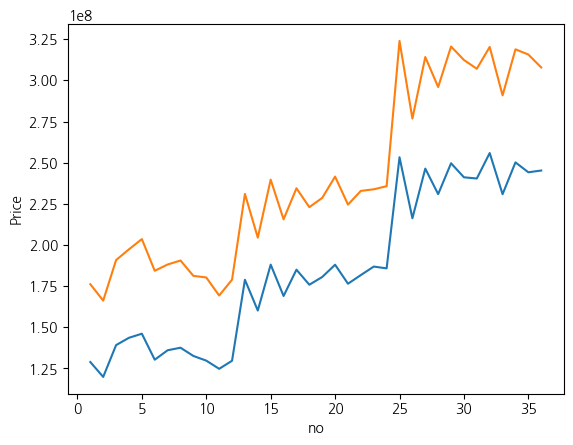

In [12]:
sns.lineplot(data = make_df, x='no', y='Price')
sns.lineplot(data = fresh_df, x='no', y='Price')

### 증가율로 비교

In [13]:
make_df['증가율'] = make_df['Price'].pct_change() * 100
make_df['증가율'].fillna(0, inplace=True)

fresh_df['증가율'] = fresh_df['Price'].pct_change() * 100
fresh_df['증가율'].fillna(0, inplace=True)

make_df.head()

pd.merge(fresh_df, make_df)

,ItemLargeName,Year,Month,Price,no,증가율


In [14]:
fresh_df['ratio'] = make_df['Price']/fresh_df['Price']

<Axes: xlabel='no', ylabel='증가율'>

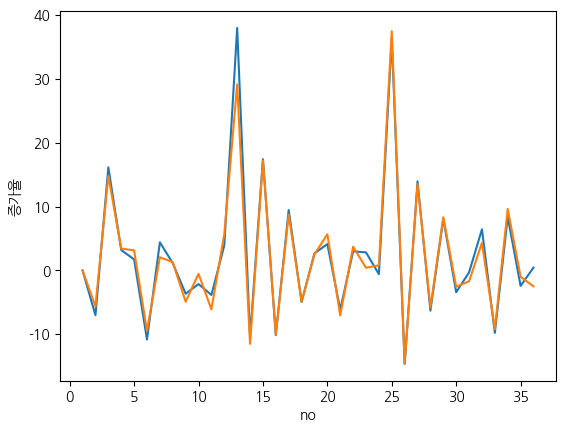

In [15]:
sns.lineplot(data = make_df, x='no', y='증가율')
sns.lineplot(data = fresh_df, x='no', y='증가율')

- 가공식품이 신선식품보다 매출액이 낮은 상황이라 성장여지가 큼
- 그런데도 가공식품 매출액 증가율이 신선식품과 거의 비슷함
- 가공식품에 대한 판매 정책이 미진함

<Axes: xlabel='no', ylabel='ratio'>

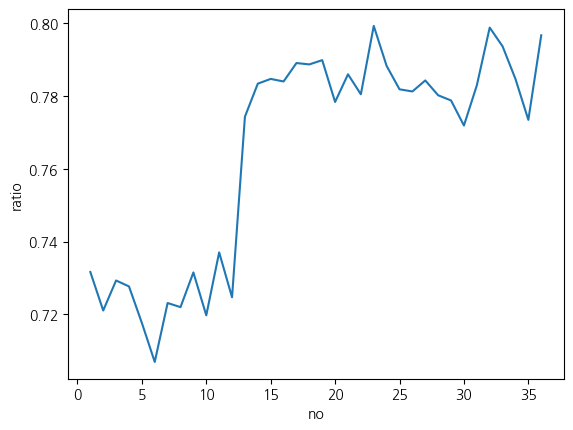

In [16]:
# 가공 / 신선 매출액 비율
sns.lineplot(data = fresh_df, x='no', y='ratio')

### 가공식품 & 신선식품 상품 수

In [17]:
make_fresh_count_df = kurly.groupby(['Year', 'ItemLargeName'])['ItemName'].count().unstack()[['가공식품','신선식품']]
make_fresh_count_df = make_fresh_count_df.stack().reset_index()

In [18]:
make_fresh_count_df.columns=['Year', 'Type', 'Counts']
make_fresh_count_df

,Year,Type,Counts
0,2021,가공식품,120213
1,2021,신선식품,139333
2,2022,가공식품,154611
3,2022,신선식품,167897
4,2023,가공식품,199807
5,2023,신선식품,216111


<Axes: xlabel='Year', ylabel='Counts'>

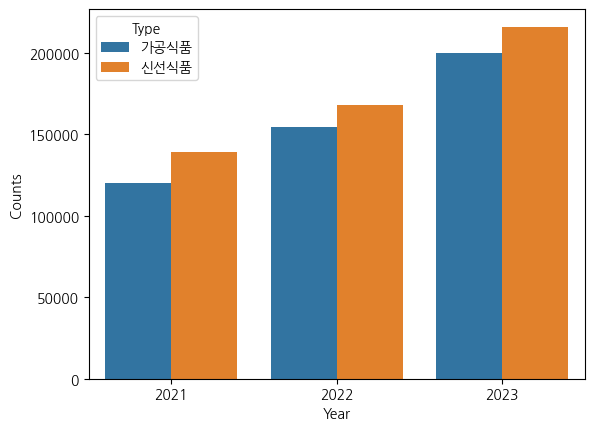

In [19]:
sns.barplot(data = make_fresh_count_df, x = 'Year', y = 'Counts', hue='Type')


## 요일별 배송지연율

In [20]:
# 전체 배송지연율
kurly['Delay_YN'].mean()

0.03870773948646868

In [21]:
# 주문요일별 배송지연율
grouped_data = kurly.groupby('WeekdayName')['Delay_YN'].value_counts(normalize=True).rename("percentage").reset_index()
grouped_data.sort_values(by=['percentage'])

,WeekdayName,Delay_YN,percentage
1,Friday,1,0.031089
5,Saturday,1,0.036901
11,Tuesday,1,0.037983
9,Thursday,1,0.039253
7,Sunday,1,0.039575
13,Wednesday,1,0.040886
3,Monday,1,0.041560
2,Monday,0,0.958440
12,Wednesday,0,0.959114
6,Sunday,0,0.960425


In [22]:
# 배송요일별 배송지연율
grouped_data = kurly.groupby('WeekdayName_Delivery')['Delay_YN'].value_counts(normalize=True).rename("percentage").reset_index()
grouped_data.sort_values(by=['percentage'])

,WeekdayName_Delivery,Delay_YN,percentage
5,Saturday,1,0.033247
11,Wednesday,1,0.037582
3,Monday,1,0.038706
1,Friday,1,0.039009
7,Thursday,1,0.040659
9,Tuesday,1,0.042009
8,Tuesday,0,0.957991
6,Thursday,0,0.959341
0,Friday,0,0.960991
2,Monday,0,0.961294


|   |월|화|수|목|금|토|
|---|---|---|---|---|---|---|
|배송지연율(%)|3.9|4.2|3.8|4.1|3.9|3.3|

- 토요일의 배송지연율이 낮다(약 3.3%)
- 평균(4.1%) 대비 84% 수준
- 화요일(4.36%) 대비 80% 수준
- 원인??


In [23]:
# 요일별 배송 수
weekdays = []
counts = []
for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:

    weekdays.append(weekday)
    counts.append(kurly[kurly['WeekdayName_Delivery']==weekday]['idOrder'].count())

count_weekday_delivery = pd.DataFrame({'weekday': weekdays,
                                       'count': counts})
count_weekday_delivery

,weekday,count
0,Monday,213742
1,Tuesday,156015
2,Wednesday,155075
3,Thursday,179370
4,Friday,178318
5,Saturday,136191
6,Sunday,0


<Axes: xlabel='weekday', ylabel='count'>

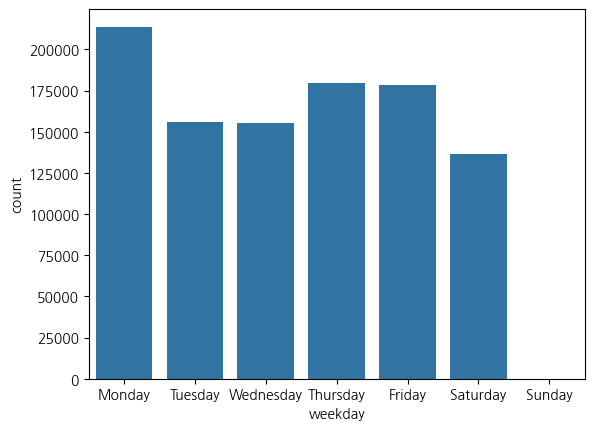

In [24]:
# 요일별 배송 수
sns.barplot(data = count_weekday_delivery, x = 'weekday', y='count')

- 화요일에 배송 지연율이 높은 이유
    - 일요일 주문 많음 & 일요일 배송 안 함
    - 월요일에 배달 건 폭주
    - 감당을 못함
    - 배송이 화요일로 밀림
    - 화요일에 예상치 못한 배송량이 늘어나서 배송 지연율 증가
- 목요일에 배송 지연율이 높은 이유
    - 수요일 주문량이 많아서
- 토요일에 배송 지연율이 낮은 이유
    - 금요일 주문량이 적어서

In [25]:
# 요일별 매출
weekday_q = kurly.groupby('WeekdayName')['idOrder'].count().reset_index()
weekday_q

,WeekdayName,idOrder
0,Friday,126732
1,Monday,143335
2,Saturday,9539
3,Sunday,219884
4,Thursday,177005
5,Tuesday,158020
6,Wednesday,184196


<Axes: xlabel='WeekdayName', ylabel='idOrder'>

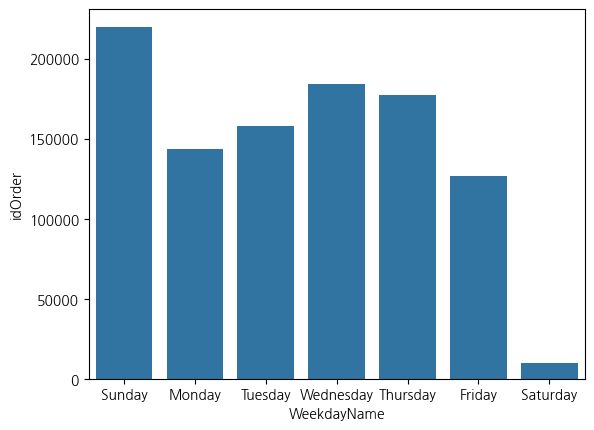

In [26]:
sns.barplot(data=weekday_q, x='WeekdayName', y='idOrder',
             order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

- 도착 전 날 매출과는 크게 관련 없는 듯

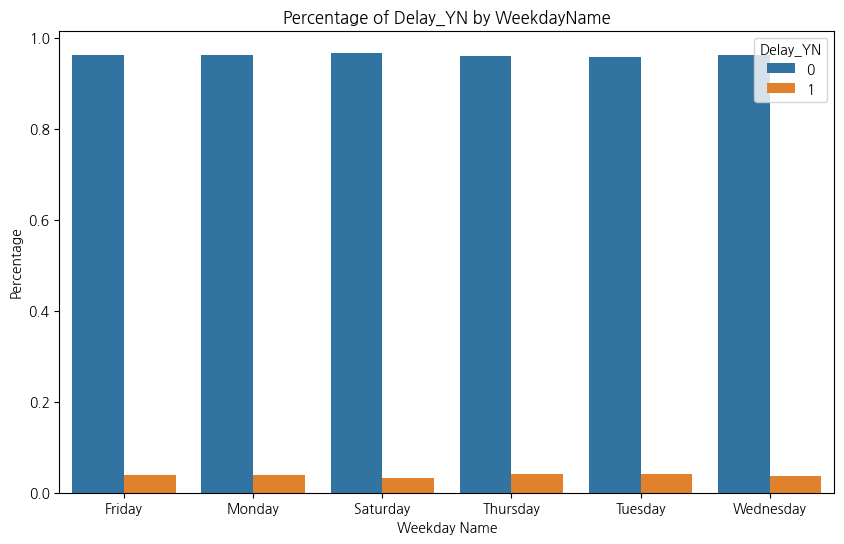

In [27]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x="WeekdayName_Delivery", y="percentage", hue="Delay_YN", data=grouped_data)
plt.title("Percentage of Delay_YN by WeekdayName")
plt.ylabel("Percentage")
plt.xlabel("Weekday Name")

plt.show()

## 주문시간별 배송지연율

In [28]:
Hour_delay = kurly.groupby('Hour')['Delay_YN'].mean().reset_index()
Hour_delay.head()

,Hour,Delay_YN
0,0,0.036010
1,1,0.033152
2,2,0.024434
3,3,0.048292
4,4,0.034146


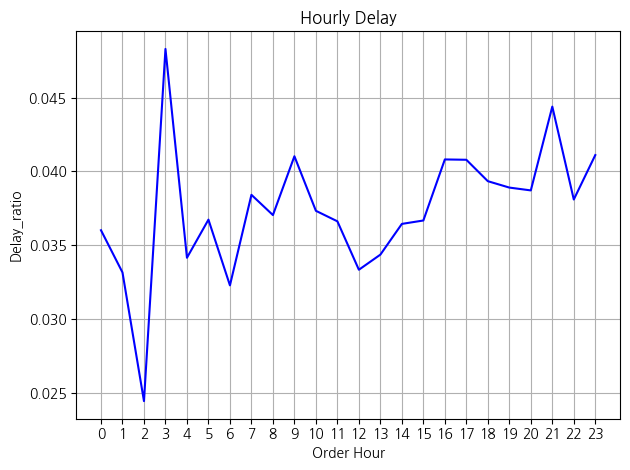

In [29]:
# 그래프 그리기
plt.plot(Hour_delay['Hour'], Hour_delay['Delay_YN'], color='b', linestyle='-')
# 그래프 제목과 축 레이블
plt.title('Hourly Delay')
plt.xlabel('Order Hour')
plt.ylabel('Delay_ratio')
# 그래프 보여주기
plt.grid(True)
plt.xticks(range(24))  # x축 눈금을 시간대로 설정
plt.tight_layout()
plt.show()

- 주문 시간별 배송지연율
    - 새벽 3~4시에 주문시 배송지연율 매우 높음
    - 총 주문건수 약 18만개 중 500개 정도로 낮아서
    - 큰 영향은 없어 보임.

- 21시 이후 주문 & 익일 7시 이후 배송을 지연이라고 판단했을 때
    - 21~22시 주문할 경우 배송지연율이 약 7.7 %로 타 시간대보다 매우 높음




In [30]:
# Delivery_hour 추가
kurly['Delivery_Hour'] = kurly['DeliveryDT'].dt.hour
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3


Text(0.5, 1.0, '21~22시 주문시 도착시간')

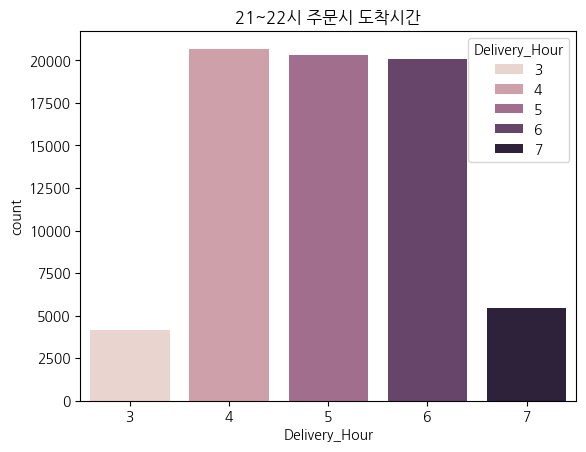

In [31]:
kurly_order_21 = kurly[kurly['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_Hour', hue = 'Delivery_Hour')
plt.title("21~22시 주문시 도착시간")

Text(0.5, 1.0, '21~22시 주문시 도착까지 걸리는 일 수')

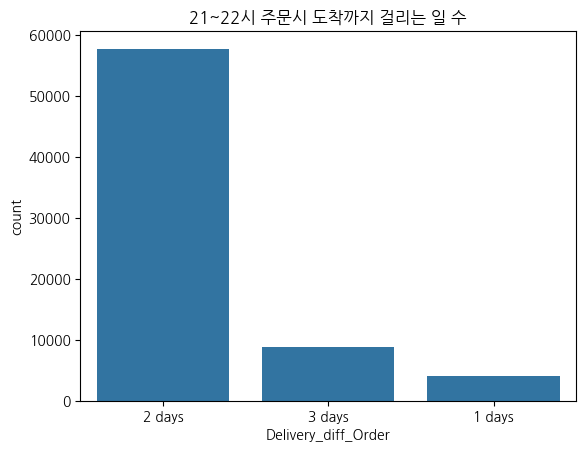

In [32]:
kurly_order_21 = kurly[kurly['Hour']==21]
sns.countplot(data = kurly_order_21, x = 'Delivery_diff_Order')
plt.title("21~22시 주문시 도착까지 걸리는 일 수")

In [33]:
# 21시 ~ 22시 주문시 도착까지 걸리는 일 수 비율
kurly_order_21['Delivery_diff_Order'].value_counts(normalize = True)

2 days    0.817115
3 days    0.125233
1 days    0.057652
Name: Delivery_diff_Order, dtype: float64

Text(0.5, 1.0, '21~22시 주문하여 배송에 2일 걸린 경우의 배송 수')

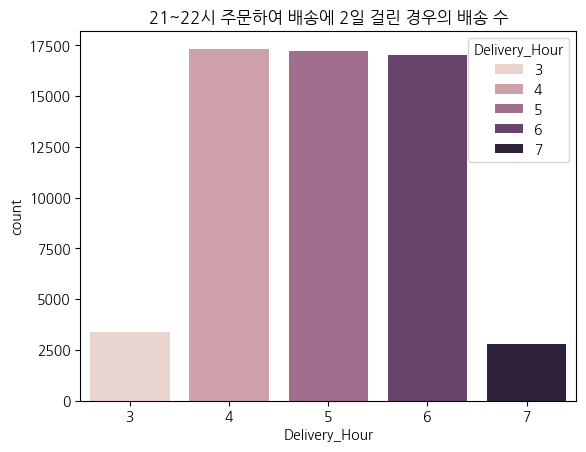

In [34]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율 plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days'], x = 'Delivery_Hour', hue='Delivery_Hour')
plt.title("21~22시 주문하여 배송에 2일 걸린 경우의 배송 수")

In [35]:
# 21~22시 주문하여 배송에 2일 걸린 경우의 배송지연율
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='2 days']['Delivery_Hour'].value_counts(normalize=True)

4    0.300087
5    0.298494
6    0.294842
3    0.058421
7    0.048156
Name: Delivery_Hour, dtype: float64

Text(0.5, 1.0, '21~22시 주문하여 배송에 1일 걸린 경우의 배송 수')

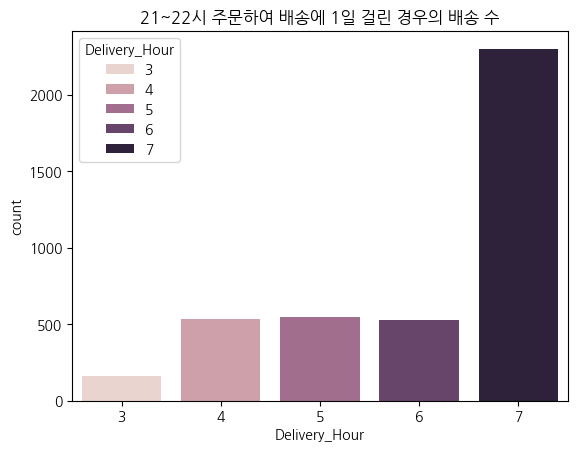

In [36]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터) plot
sns.countplot(data = kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days'], x = 'Delivery_Hour', hue='Delivery_Hour')
plt.title("21~22시 주문하여 배송에 1일 걸린 경우의 배송 수")

In [37]:
# 21~22시 주문하여 배송에 1일 걸린 경우의 배송지연율(약 4000개 데이터)
kurly_order_21[kurly_order_21['Delivery_diff_Order']=='1 days']['Delivery_Hour'].value_counts(normalize=True)

7    0.565015
5    0.133955
4    0.131011
6    0.129784
3    0.040236
Name: Delivery_Hour, dtype: float64

    - 21시~22시에 주문한 경우
        - 배송에 2일이 걸릴 때 배송지연율은 약 4.8%
        - 배송에 1일이 걸릴 때 배송지연율은 약 57%
    - 21시~22시에 주문하여 바로 다음 날 배송을 하려할 때 배송 지연이 굉장히 많다.

Text(0.5, 1.0, '22시 이후 주문시 도착까지 걸리는 일 수')

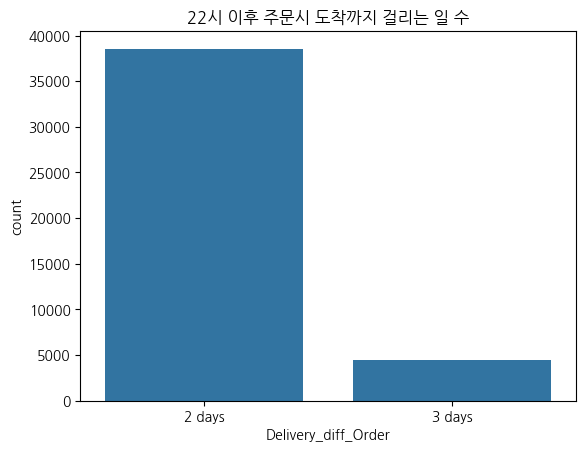

In [38]:
# 22시 이후 주문 중 바로 다음날 배송해준 건수
kurly_order_after22 = kurly[kurly['Hour']==22 | 23]
sns.countplot(data = kurly_order_after22, x = 'Delivery_diff_Order')
plt.title("22시 이후 주문시 도착까지 걸리는 일 수")

- 22시 이후 주문한 경우 모두 2일 이후 배송

- 정리
    1. 21시 ~ 22시에 주문한 경우 배송지연율 높다(약 7.7%).
    2. 우리 회사는 21시 전 주문 건만 익일새벽배송이 원칙.
    3. 21시 ~ 22시에 주문한 것 중 익일새벽배송이 존재(약 5.8%)
    4. 21시 ~ 22시에 주문한 것이 익일새벽배송일 때 배송지연율이 높음(약 57%)
    5. 21시 이후 주문에 대하여 익일새벽배송을 하려고 할 때의 프로세스 개선이 필요

## 상품에 따른 지연율


In [39]:
item_delay = kurly.groupby("ItemMiddleName")['Delay_YN'].mean().reset_index()
item_delay

,ItemMiddleName,Delay_YN
0,곡물,0.039038
1,과일,0.038697
2,과자,0.038803
3,냉동,0.038494
4,생수,0.035534
5,수산,0.038437
6,신선,0.039628
7,양념,0.038472
8,음료,0.041167
9,즉석,0.040453


In [40]:
kurly[kurly['ItemMiddleName']=='생수']['ItemName'].unique()

array(['지리산 물하나 500ml 40병 생수', '동원 샘물 2l x 36병 미네랄워터 생수 (당일출고)',
       '안전한생수 휘오 다이아몬드 ec 생수 미네랄워터 물 3',
       '몽베스트 1l 2l 330ml 500ml 미네랄워터 안전한 생수 미니 식수 물 배달',
       '몽베스트 위드어스 무라벨 2lx24 생수배달 dk',
       '제주삼다수무라벨 백산수무라벨 무라벨생수 그린 500ml 2l 6펫 12 20 40 개',
       '볼빅 수입 생수 volvic 1.5lx12(pet) 무료배송 가족생수', '제주 삼다수 2l x 6개 생수',
       '[롯데] 생수 아이시스8.0 (500mlpet)',
       '생수/제주 삼다수 2l x 6병 0.5l x 20병 한박스 선택', '[무료배송] 마신다 생수 2l 펫트 x 24개',
       '하이트진로 석수 500ml 20병 생수', '삼다수 그린 500ml x 40병 [당일출고] 미네랄워터 무라벨 생수',
       '삼다수 그린 500ml x 20병 [당일출고] 미네랄워터 무라벨 생수', '제주삼다수 생수 2l 12개',
       '[롯데] 생수 아  생수 아이시 스8.0 (500mlpet)',
       '2l 제주 dae 삼다수 x 6개 안전박스포장 생수2l', '오리온 닥터유 생수 제주용암수 530mlx20',
       '수블리 [무료배송] 수블리 생수 미네랄 워터 2l x 12개', '아이시스 8.0 생수  500ml  50개',
       '제주 용암수 삼다수무라벨 그린 생수 2l 6개 2l12 2l18 2l24 삼다수 가정배달',
       '(1700070) 몽베스트 생수 500mlx20개',
       '삼다수 그린 2l x 42병 [당일출고] 미네랄워터 무라벨 생수',
       'dae 제주 삼다수 2l x 6개(안전박스포장) 생수2l', '(1700060) 몽베스트 생수 330mlx20개',
       '박스포장 무라

(0.035, 0.045)

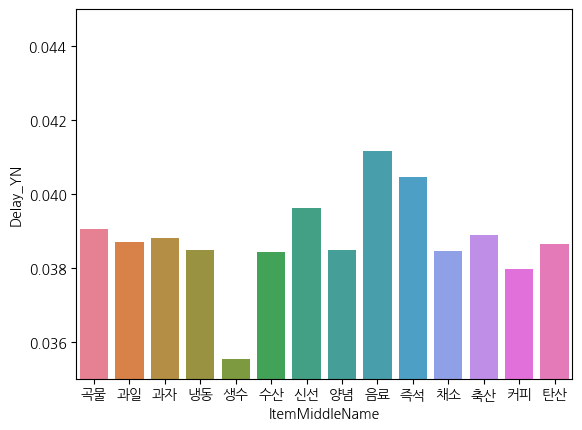

In [41]:
sns.barplot(data = item_delay, x = 'ItemMiddleName', y='Delay_YN', hue= 'ItemMiddleName')
plt.ylim((0.035, 0.045))

- 생수의 지연율이 낮다(평균 4.1% / 생수 3.78%)
- 이유: 쟁여두기가 가능해서??
- 차이는 미미함
- 비율 검정 결과 차이가 유의하지 않음

## 시간대별 도착건수

In [42]:
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3


In [43]:
kurly['DeliveryHM'] = kurly['DeliveryDT'].apply(lambda x: x.strftime('%H:%M'))

In [44]:
delivery_time = kurly.groupby('DeliveryHM')['idOrder'].count().reset_index()

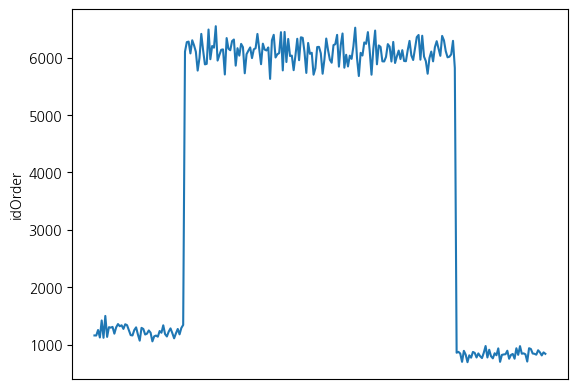

In [45]:
sns.lineplot(data = delivery_time, x = 'DeliveryHM', y='idOrder')
plt.gca().axes.xaxis.set_visible(False)

## 신규고객

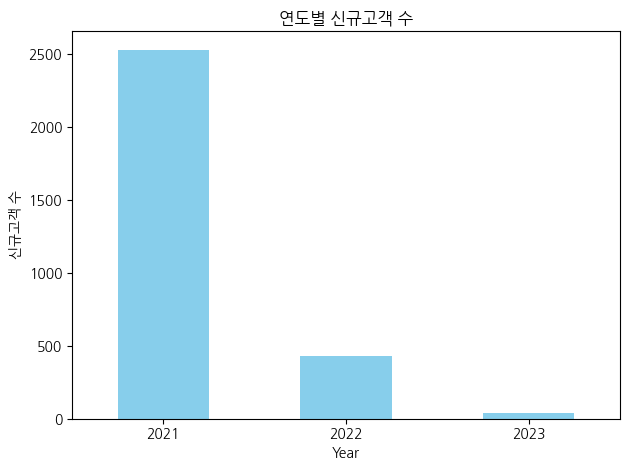

In [46]:
### 신규고객 수 그래프
first_order = kurly[['idUser','OrderDT','Year']].sort_values(['idUser','OrderDT'])
first_order.drop_duplicates('idUser', inplace = True)
# Year 별로 idUser의 수를 계산
user_count_by_year = first_order.groupby('Year')['idUser'].count()
# 그래프 그리기
user_count_by_year.plot(kind='bar', color='skyblue')
plt.title('연도별 신규고객 수')
plt.xlabel('Year')
plt.ylabel('신규고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
user_count_by_year

Year
2021    2532
2022     431
2023      37
Name: idUser, dtype: int64

In [48]:
###신규고객 감소율
user_count_by_year = pd.DataFrame(user_count_by_year)
user_count_by_year.rename(columns={'idUser': 'Value'}, inplace=True)
# 이전 연도 값
previous_year_value = user_count_by_year['Value'].shift(1)
# 감소율 계산
decrease_rate = ((previous_year_value - user_count_by_year['Value']) / previous_year_value) * 100
# 결과 출력
decrease_rate.dropna(inplace=True)  # 첫 번째 행은 비교할 이전 연도 값이 없으므로 삭제
print(decrease_rate)

Year
2022    82.977883
2023    91.415313
Name: Value, dtype: float64


In [49]:
LastOrder = kurly.groupby("idUser")['OrderDT'].max().reset_index()
LastOrder

,idUser,OrderDT
0,U10001,2023-12-27 08:25:54
1,U10002,2023-12-06 10:16:48
2,U10003,2023-12-23 21:09:58
3,U10004,2023-12-05 20:24:04
4,U10005,2023-11-20 12:40:36
...,...,...
2995,U12996,2023-12-29 18:56:12
2996,U12997,2023-12-26 20:27:53
2997,U12998,2023-11-27 19:51:55
2998,U12999,2023-12-27 10:22:26


## 이탈고객 수

In [50]:
### 이탈고객수
last_order = kurly[['idUser','OrderDT','Year','Month','Day']].sort_values(['idUser','OrderDT'])
last_order.drop_duplicates('idUser', inplace = True, keep = 'last')
#100일전 2023년 9월 22일 기준
last_order[last_order['OrderDT'] < '2023-09-22']
#12명;;

,idUser,OrderDT,Year,Month,Day
52768,U10157,2023-08-23 09:02:16,2023,8,23
102567,U10301,2023-09-19 20:23:01,2023,9,19
171339,U10508,2023-09-20 11:24:49,2023,9,20
176393,U10525,2023-09-18 16:35:40,2023,9,18
289902,U10860,2023-06-21 21:46:29,2023,6,21
477577,U11411,2023-08-23 09:54:47,2023,8,23
547426,U11614,2023-08-24 20:54:41,2023,8,24
578575,U11703,2023-09-18 22:31:00,2023,9,18
825667,U12432,2023-09-06 06:27:14,2023,9,6
855709,U12524,2023-09-04 20:05:16,2023,9,4


## 지연율 - 매출/고객 수 관계(그래프, 상관관계)
    - 1달 단위

In [51]:
delay = []
sales = []

In [52]:
years = [2021, 2022, 2023]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

In [53]:
for year in years:
    for month in months:
        tmp_delay = kurly[(kurly['Year'] == year) & (kurly['Month']==month)]['Delay_YN'].mean().round(3)
        tmp_sales = kurly[(kurly['Year'] == year) & (kurly['Month']==month)]['Price'].sum()
        delay.append(tmp_delay)
        sales.append(tmp_sales)

In [54]:
delay

[0.036,
 0.04,
 0.04,
 0.038,
 0.039,
 0.044,
 0.039,
 0.037,
 0.044,
 0.04,
 0.041,
 0.037,
 0.041,
 0.04,
 0.039,
 0.04,
 0.041,
 0.04,
 0.037,
 0.04,
 0.042,
 0.036,
 0.038,
 0.038,
 0.036,
 0.038,
 0.041,
 0.042,
 0.039,
 0.033,
 0.034,
 0.039,
 0.038,
 0.043,
 0.037,
 0.035]

In [55]:
sales

[311382560,
 292132450,
 337151130,
 348173320,
 356819510,
 321194120,
 330809600,
 335352250,
 320315030,
 317297730,
 300711740,
 315148830,
 419329430,
 372714610,
 436808850,
 391817800,
 428530360,
 407464710,
 417998350,
 439460720,
 410315010,
 423825380,
 429316070,
 430916280,
 591782820,
 504828200,
 573984990,
 539076200,
 583146350,
 566157150,
 560577330,
 590746000,
 534173950,
 583188320,
 572390770,
 564815010]

In [56]:
delay_sales_df = pd.DataFrame({'delay': delay,
                               'sales': sales})

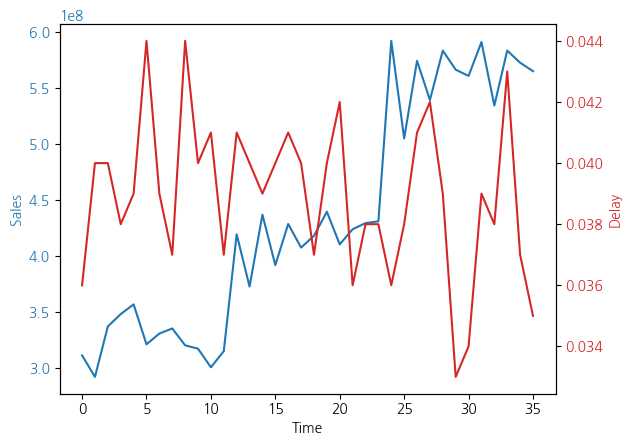

In [57]:
# plot 생성
fig, ax1 = plt.subplots()

# 왼쪽 y축 (sales)
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales', color=color)
ax1.plot(delay_sales_df.index, delay_sales_df['sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 오른쪽 y축 (delay)을 위한 새로운 축 생성
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Delay', color=color)
ax2.plot(delay_sales_df.index, delay_sales_df['delay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 보이기
plt.show()

In [58]:
delay_sales_df.corr()

,delay,sales
delay,1.000000,-0.293807
sales,-0.293807,1.000000


In [59]:
year_sales = kurly.groupby('Year')['Price'].sum().reset_index()
year_sales

,Year,Price
0,2021,3886488270
1,2022,5008497570
2,2023,6764867090


## 연간 매출액

Text(0, 0.5, 'Sales')

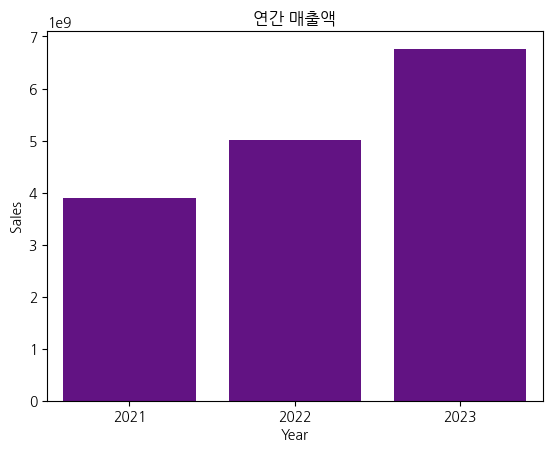

In [60]:
sales_plot = sns.barplot(data = year_sales, x = 'Year', y='Price', color = '#6A0096')
sales_plot.set(title='연간 매출액')
plt.ylabel("Sales")

## Combined 별 count

In [61]:
users = pd.read_csv("on_users.csv", encoding='cp949')
users.head()

,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y


In [62]:
# 주문 수
kurly.groupby('Combined')['idUser'].count() # --> 얘로 뭘 끄집어낼건지 e.g. 여자만 할 줄 알았는데, 남자도 많이 함 -> 남성 노리는 마케팅

Combined
2030s, 남성    304966
2030s, 여성    406741
4060s, 남성     98432
4060s, 여성    208572
Name: idUser, dtype: int64

In [63]:
# 사람 수
kurly2 = kurly.copy()
kurly2.drop_duplicates(subset = 'idUser', inplace = True)
kurly2.groupby('Combined')['idUser'].count()

Combined
2030s, 남성     902
2030s, 여성    1198
4060s, 남성     288
4060s, 여성     612
Name: idUser, dtype: int64

In [64]:
kurly.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,TimeBetweenOrders,Combined,Weekday,WeekdayName,Date_Delivery,Delivery_diff_Order,Weekday_Delivery,WeekdayName_Delivery,Delivery_Hour,DeliveryHM
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12-04,1 days,5,Saturday,3,03:26


In [65]:
kurly.columns

Index(['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT',
       'Delay_YN', 'ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode',
       'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemName',
       'Gender', 'Age', 'FamilyCount', 'MemberYN', 'AgeGroup', 'Date', 'Year',
       'Month', 'Day', 'Hour', 'CleanedItemName', 'TimeBetweenOrders',
       'Combined', 'Weekday', 'WeekdayName', 'Date_Delivery',
       'Delivery_diff_Order', 'Weekday_Delivery', 'WeekdayName_Delivery',
       'Delivery_Hour', 'DeliveryHM'],
      dtype='object')

## 모델링용 csv 파일 만들기
    - 일주일 후 매출액 예측

In [66]:
date_range_df = pd.DataFrame({"Date": pd.date_range(start="2021-01-01", end="2023-12-31")})

# 결과 확인
date_range_df.head(), date_range_df.tail()

(        Date
 0 2021-01-01
 1 2021-01-02
 2 2021-01-03
 3 2021-01-04
 4 2021-01-05,
            Date
 1090 2023-12-27
 1091 2023-12-28
 1092 2023-12-29
 1093 2023-12-30
 1094 2023-12-31)

In [67]:
date_range_df

,Date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
1090,2023-12-27
1091,2023-12-28
1092,2023-12-29
1093,2023-12-30


In [68]:
df1 = kurly.groupby(['Date','Gender'])['idOrder'].count()
df1 = df1.unstack()
df1

Gender,남성,여성
Date,,
2021-01-01,679.0,865.0
2021-01-03,8.0,31.0
2021-01-04,808.0,1347.0
2021-01-05,160.0,233.0
2021-01-07,306.0,554.0
...,...,...
2023-12-27,578.0,795.0
2023-12-28,554.0,855.0
2023-12-29,432.0,629.0


In [69]:
df2 = kurly.groupby(['Date','AgeGroup'])['idOrder'].count()
df2 = df2.unstack()
df2

AgeGroup,2030s,4060s
Date,,
2021-01-01,1026.0,518.0
2021-01-03,20.0,19.0
2021-01-04,1445.0,710.0
2021-01-05,266.0,127.0
2021-01-07,614.0,246.0
...,...,...
2023-12-27,1038.0,335.0
2023-12-28,938.0,471.0
2023-12-29,759.0,302.0


In [70]:
df = pd.merge(date_range_df,df1, on='Date', how='left')
df = pd.merge(df, df2, on='Date', how='left')
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.weekday
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Weekday'] = df['Weekday'].map(weekday_map)
df['Sat_YN'] = df['Weekday']=='Saturday'
df

,Date,남성,여성,2030s,4060s,Weekday,Sat_YN
0,2021-01-01,679.0,865.0,1026.0,518.0,Friday,False
1,2021-01-02,NaN,NaN,NaN,NaN,Saturday,True
2,2021-01-03,8.0,31.0,20.0,19.0,Sunday,False
3,2021-01-04,808.0,1347.0,1445.0,710.0,Monday,False
4,2021-01-05,160.0,233.0,266.0,127.0,Tuesday,False
...,...,...,...,...,...,...,...
1090,2023-12-27,578.0,795.0,1038.0,335.0,Wednesday,False
1091,2023-12-28,554.0,855.0,938.0,471.0,Thursday,False
1092,2023-12-29,432.0,629.0,759.0,302.0,Friday,False
1093,2023-12-30,37.0,57.0,64.0,30.0,Saturday,True


In [71]:
df3 = kurly.groupby('Date')['Delay_YN'].mean().reset_index()

In [72]:
df = pd.merge(df, df3, on='Date', how='left')
df

,Date,남성,여성,2030s,4060s,Weekday,Sat_YN,Delay_YN
0,2021-01-01,679.0,865.0,1026.0,518.0,Friday,False,0.024611
1,2021-01-02,NaN,NaN,NaN,NaN,Saturday,True,NaN
2,2021-01-03,8.0,31.0,20.0,19.0,Sunday,False,0.000000
3,2021-01-04,808.0,1347.0,1445.0,710.0,Monday,False,0.038515
4,2021-01-05,160.0,233.0,266.0,127.0,Tuesday,False,0.025445
...,...,...,...,...,...,...,...,...
1090,2023-12-27,578.0,795.0,1038.0,335.0,Wednesday,False,0.040787
1091,2023-12-28,554.0,855.0,938.0,471.0,Thursday,False,0.026260
1092,2023-12-29,432.0,629.0,759.0,302.0,Friday,False,0.032045
1093,2023-12-30,37.0,57.0,64.0,30.0,Saturday,True,0.000000


In [73]:
df4 = kurly.groupby('Date')['Price'].sum().reset_index()
df = pd.merge(df, df4, on='Date', how='left')

In [74]:
df5 = kurly.groupby(['Date'])['Gender'].value_counts(normalize=True).unstack()
df5 = df5[['여성']]
df = pd.merge(df, df5, on = 'Date', how='left')

In [75]:
df6 = kurly.groupby(['Date'])['AgeGroup'].value_counts(normalize=True).unstack()
df6 = df6[['2030s']]
df = pd.merge(df, df6, on = 'Date', how='left')

In [76]:
df

,Date,남성,여성_x,2030s_x,4060s,Weekday,Sat_YN,Delay_YN,Price,여성_y,2030s_y
0,2021-01-01,679.0,865.0,1026.0,518.0,Friday,False,0.024611,22887260.0,0.560233,0.664508
1,2021-01-02,NaN,NaN,NaN,NaN,Saturday,True,NaN,NaN,NaN,NaN
2,2021-01-03,8.0,31.0,20.0,19.0,Sunday,False,0.000000,660410.0,0.794872,0.512821
3,2021-01-04,808.0,1347.0,1445.0,710.0,Monday,False,0.038515,31532410.0,0.625058,0.670534
4,2021-01-05,160.0,233.0,266.0,127.0,Tuesday,False,0.025445,5682250.0,0.592875,0.676845
...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,578.0,795.0,1038.0,335.0,Wednesday,False,0.040787,22032270.0,0.579024,0.756009
1091,2023-12-28,554.0,855.0,938.0,471.0,Thursday,False,0.026260,22423860.0,0.606813,0.665720
1092,2023-12-29,432.0,629.0,759.0,302.0,Friday,False,0.032045,16659780.0,0.592837,0.715363
1093,2023-12-30,37.0,57.0,64.0,30.0,Saturday,True,0.000000,1479180.0,0.606383,0.680851


In [77]:
df.columns = ['Date', '남성', '여성', '2030s', '4060s', 'Weekday', 'Sat_YN',
       'Delay_YN', 'Price', '여성 비율', '2030s 비율']
df

,Date,남성,여성,2030s,4060s,Weekday,Sat_YN,Delay_YN,Price,여성 비율,2030s 비율
0,2021-01-01,679.0,865.0,1026.0,518.0,Friday,False,0.024611,22887260.0,0.560233,0.664508
1,2021-01-02,NaN,NaN,NaN,NaN,Saturday,True,NaN,NaN,NaN,NaN
2,2021-01-03,8.0,31.0,20.0,19.0,Sunday,False,0.000000,660410.0,0.794872,0.512821
3,2021-01-04,808.0,1347.0,1445.0,710.0,Monday,False,0.038515,31532410.0,0.625058,0.670534
4,2021-01-05,160.0,233.0,266.0,127.0,Tuesday,False,0.025445,5682250.0,0.592875,0.676845
...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,578.0,795.0,1038.0,335.0,Wednesday,False,0.040787,22032270.0,0.579024,0.756009
1091,2023-12-28,554.0,855.0,938.0,471.0,Thursday,False,0.026260,22423860.0,0.606813,0.665720
1092,2023-12-29,432.0,629.0,759.0,302.0,Friday,False,0.032045,16659780.0,0.592837,0.715363
1093,2023-12-30,37.0,57.0,64.0,30.0,Saturday,True,0.000000,1479180.0,0.606383,0.680851


In [78]:
kurly['Gender'].value_counts(normalize=True)['여성']

0.6040113437471472

In [79]:
# 결측치 대체용 평균
male_21_wed_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Wednesday')]['남성'].mean()
male_21_sat_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Saturday')]['남성'].mean()
male_23_sat_mean = df[(df['Date']>='2023-1-1') & (df['Weekday']=='Saturday')]['남성'].mean()
female_21_wed_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Wednesday')]['여성'].mean()
female_21_sat_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Saturday')]['여성'].mean()

age_2030_wed_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Wednesday')]['2030s'].mean()
age_4060_wed_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Wednesday')]['4060s'].mean()
age_2030_sat_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Saturday')]['2030s'].mean()
age_4060_sat_mean = df[(df['Date']<='2021-12-31') & (df['Weekday']=='Saturday')]['4060s'].mean()
age_4060_sat_mean_2 = df[(df['Date']>='2021-12-31') & (df['Date']<='2022-12-31') & (df['Weekday']=='Saturday')]['4060s'].mean()

delay_mean = df['Delay_YN'].mean()

male_21_wed_mean = df[(df['Date']<='2021-12-31')& (df['Weekday']=='Wednesday')]['Price'].mean()
male_21_sat_mean = df[(df['Date']<='2021-12-31')& (df['Weekday']=='Saturday')]['Price'].mean()

ratio_female = kurly['Gender'].value_counts(normalize=True)['여성']
ratio_2030 = kurly['AgeGroup'].value_counts(normalize=True)['2030s']

In [80]:
# 결측치 대체
df.loc[(df['Date']<='2021-12-31')&(df['남성'].isnull())&(df['Weekday']=='Wednesday'), '남성'] = male_21_wed_mean
df.loc[(df['Date']<='2021-12-31')&(df['남성'].isnull())&(df['Weekday']=='Saturday'), '남성'] = male_21_sat_mean
df.loc[(df['Date']>='2023-1-1')&(df['남성'].isnull())&(df['Weekday']=='Saturday'), '남성'] = male_23_sat_mean
df.loc[(df['Date']<='2021-12-31')&(df['여성'].isnull())&(df['Weekday']=='Wednesday'), '여성'] = female_21_wed_mean
df.loc[(df['Date']<='2021-12-31')&(df['여성'].isnull())&(df['Weekday']=='Saturday'), '여성'] = female_21_sat_mean

df.loc[(df['Date']<='2021-12-31')&(df['2030s'].isnull())&(df['Weekday']=='Wednesday'), '2030s'] = age_2030_wed_mean
df.loc[(df['Date']<='2021-12-31')&(df['2030s'].isnull())&(df['Weekday']=='Saturday'), '2030s'] = age_2030_sat_mean
df.loc[(df['Date']<='2021-12-31')&(df['4060s'].isnull())&(df['Weekday']=='Wednesday'), '4060s'] = age_4060_wed_mean
df.loc[(df['Date']<='2021-12-31')&(df['4060s'].isnull())&(df['Weekday']=='Saturday'), '4060s'] = age_4060_sat_mean
df.loc[(df['Date']>='2021-12-31') & (df['Date']<='2022-12-31') &(df['4060s'].isnull())&(df['Weekday']=='Saturday'), '4060s'] = age_4060_sat_mean_2

df.loc[df['Delay_YN'].isnull(), 'Delay_YN'] = delay_mean

df.loc[(df['Date']<='2021-12-31')&(df['Price'].isnull())&(df['Weekday']=='Wednesday'), 'Price'] = male_21_wed_mean
df.loc[(df['Date']<='2021-12-31')&(df['Price'].isnull())&(df['Weekday']=='Saturday'), 'Price'] = male_21_sat_mean

df.loc[df['여성 비율'].isnull(), '여성 비율'] = ratio_female
df.loc[df['2030s 비율'].isnull(), '2030s 비율'] = ratio_female

df.isnull().sum()

Date        0
남성          0
여성          0
2030s       0
4060s       0
Weekday     0
Sat_YN      0
Delay_YN    0
Price       0
여성 비율       0
2030s 비율    0
dtype: int64

In [81]:
df_model = df.drop(['Weekday','Sat_YN'], axis=1)
df_model

,Date,남성,여성,2030s,4060s,Delay_YN,Price,여성 비율,2030s 비율
0,2021-01-01,679.000000,865.000000,1026.00000,518.0,0.024611,2.288726e+07,0.560233,0.664508
1,2021-01-02,623178.809524,27.108108,30.04878,16.0,0.037942,6.231788e+05,0.604011,0.604011
2,2021-01-03,8.000000,31.000000,20.00000,19.0,0.000000,6.604100e+05,0.794872,0.512821
3,2021-01-04,808.000000,1347.000000,1445.00000,710.0,0.038515,3.153241e+07,0.625058,0.670534
4,2021-01-05,160.000000,233.000000,266.00000,127.0,0.025445,5.682250e+06,0.592875,0.676845
...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,578.000000,795.000000,1038.00000,335.0,0.040787,2.203227e+07,0.579024,0.756009
1091,2023-12-28,554.000000,855.000000,938.00000,471.0,0.026260,2.242386e+07,0.606813,0.665720
1092,2023-12-29,432.000000,629.000000,759.00000,302.0,0.032045,1.665978e+07,0.592837,0.715363
1093,2023-12-30,37.000000,57.000000,64.00000,30.0,0.000000,1.479180e+06,0.606383,0.680851


In [82]:
df_model['target']=df_model['Price'].shift(-7)
df_model.tail(10)

,Date,남성,여성,2030s,4060s,Delay_YN,Price,여성 비율,2030s 비율,target
1085,2023-12-22,383.0,746.0,796.0,333.0,0.018601,17589470.0,0.660762,0.705049,16659780.0
1086,2023-12-23,38.0,32.0,47.0,23.0,0.000000,1163490.0,0.457143,0.671429,1479180.0
1087,2023-12-24,702.0,902.0,1184.0,420.0,0.023691,25785060.0,0.562344,0.738155,28730790.0
1088,2023-12-25,413.0,667.0,817.0,263.0,0.012963,17628330.0,0.617593,0.756481,NaN
1089,2023-12-26,600.0,881.0,979.0,502.0,0.015530,23492940.0,0.594868,0.661040,NaN
1090,2023-12-27,578.0,795.0,1038.0,335.0,0.040787,22032270.0,0.579024,0.756009,NaN
1091,2023-12-28,554.0,855.0,938.0,471.0,0.026260,22423860.0,0.606813,0.665720,NaN
1092,2023-12-29,432.0,629.0,759.0,302.0,0.032045,16659780.0,0.592837,0.715363,NaN
1093,2023-12-30,37.0,57.0,64.0,30.0,0.000000,1479180.0,0.606383,0.680851,NaN
1094,2023-12-31,788.0,1009.0,1375.0,422.0,0.037841,28730790.0,0.561491,0.765164,NaN


In [83]:
# 원본 Price 제거
df_model.drop('Price', axis=1, inplace=True)
df_model

,Date,남성,여성,2030s,4060s,Delay_YN,여성 비율,2030s 비율,target
0,2021-01-01,679.000000,865.000000,1026.00000,518.0,0.024611,0.560233,0.664508,1.829174e+07
1,2021-01-02,623178.809524,27.108108,30.04878,16.0,0.037942,0.604011,0.604011,6.231788e+05
2,2021-01-03,8.000000,31.000000,20.00000,19.0,0.000000,0.794872,0.512821,1.308180e+06
3,2021-01-04,808.000000,1347.000000,1445.00000,710.0,0.038515,0.625058,0.670534,2.877023e+07
4,2021-01-05,160.000000,233.000000,266.00000,127.0,0.025445,0.592875,0.676845,4.363620e+06
...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,578.000000,795.000000,1038.00000,335.0,0.040787,0.579024,0.756009,NaN
1091,2023-12-28,554.000000,855.000000,938.00000,471.0,0.026260,0.606813,0.665720,NaN
1092,2023-12-29,432.000000,629.000000,759.00000,302.0,0.032045,0.592837,0.715363,NaN
1093,2023-12-30,37.000000,57.000000,64.00000,30.0,0.000000,0.606383,0.680851,NaN


In [84]:
df_model.to_csv("df_model.csv",index=False)